In [1]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Development team: Stéphane Sénési (CNRM-GAME), Gaëlle Rigoudy (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL), Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##   
##### contact: climaf@meteo.fr
##### users list: climaf-users@meteo.fr

The goals of CliMAF are to provide the scientists with simplified and science-oriented means for :
- accessing both model and references data
- pre-tretament (period and geographical selections, regridding, averaging like seasonal mean computations...)
- plotting  maps, cross-sections and time series
- building  atlases
- plugging personal scripts in an atlas or in an analysis workflow
- sharing such scripts
- handlling ensembles (multi-model, multi-realization)
CliMAF provides full managment of the outputs by handling the naming of the output files; it also stores the information on "how I obtained this file" under the form of an expression called CRS (CliMAF Reference Syntax) that allows checking for the existing files and avoid recomputing the same files twice (or more).

#  
#   

# Access to CMIP data at CLIMERI, and much more
In this notebook we will see:
- 1. A simple example with a CMIP5 dataset 
- 2. Explore an archive with the .explore() built-in method
- 3. the CMIP6 archive
- 4. use the magical CMIP5_extent project to extend the CMIP5 historical runs with a bit of scenario
- 5. CORDEX
- 6. libIGCM simulations
- 7. some references
#  

## First, import climaf

In [2]:
from climaf.api import *

CliMAF version = 1.2.13


CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post
python => /modfs/modtools-phw/miniconda2/envs/analyse_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /modfs/modtools-phw/miniconda2/envs/analyse_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /modfs/modtools-phw/miniconda2/envs/analyse_2.7/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post/bin/exiv2
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


## And set verbosity ('critical' -> minimum ; 'debug' -> maximum)

In [3]:
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

### ... and dont' forget to open the documentation in case you have questions.

### http://climaf.readthedocs.org/

### -> Use the "Quick search" space to search for what you are interested in, it is really powerfull!
#  
#  

## 1. Access to CMIP5 data: simple example

#### CliMAF dataset: access with ds()
#### One simulation/realization/member of a model, one variable, frequency/time step, and one period
#### -> if we want to work on multiple datasets at the same time, i.e. an ensemble, we will work with CliMAF ensembles (more details in Working_with_CliMAF_ensembles.ipynb)

In [4]:
# -- We use ds() to get the dataset
dat_cmip5 = ds(project='CMIP5',
               model='CNRM-CM5',
               variable='tos',
               experiment='historical',
               period='1980-1981',
               frequency='monthly',
               )
summary(dat_cmip5)
# -- summary() gives the list of files found by ds() and the pairs 'facets':'values' associated with the request
# -> The user can then refine the request to select only one file

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-1981,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': '*',
 'root': '/bdd',
 'simulation': '',
 'table': '*',
 'variable': 'tos',
 'version': 'latest'}

#### and we have our dataset.
#### But that was the simple case. Let's now see what happens when CliMAF finds multiple datasets.

## 2. Exploring the archive with the great built-in method '.explore'

#### As you can see above, some of the keys have the value '*'.
#### CliMAF offers a great way to explore your data archive: the ds().explore() built-in method.
https://climaf.readthedocs.io/en/master/functions_data.html#cdataset-explore-explore-data-and-periods-and-match-joker-attributes
#### Here is how it works.


### 2.1 ds().explore('choices')
#### ds().explore('choices') returns a dictionary with the keys having '*' as value.
#### For each key, CliMAF returns the values matching the key in the archive
#### In the first simple case, we have only one value for 'realm' and 'table'. dat_cmip5 can be used as a CliMAF dataset.

In [5]:
# -> in this case, 
dat_cmip5.explore('choices')

{'realm': 'ocean', 'table': 'Omon'}

### But we can also use '*' to explore the archive:
### for instance, we can see all the variables available for our request with variable='*' :

In [6]:
# -- We use ds() to get the dataset
dat_cmip5 = ds(project='CMIP5',
               model='CNRM-CM5',
               variable='*',
               experiment='historical',
               period='1980-1981',
               frequency='monthly',
               )
dat_cmip5.explore('choices')

{'realm': ['atmos', 'land', 'ocean', 'ocnBgchem', 'seaIce'],
 'table': ['Amon', 'Lmon', 'OImon', 'Omon'],
 'variable': ['calc',
  'clivi',
  'clt',
  'clwvi',
  'dfe',
  'dissic',
  'dissoc',
  'evap',
  'evs',
  'evspsbl',
  'fgco2',
  'fgo2',
  'hfds',
  'hfls',
  'hfss',
  'hur',
  'hurs',
  'hus',
  'huss',
  'masso',
  'mrfso',
  'mrro',
  'mrros',
  'mrso',
  'mrsos',
  'msftbarot',
  'msftmyz',
  'nh4',
  'no3',
  'o2',
  'pbo',
  'po4',
  'pr',
  'prc',
  'prsn',
  'prw',
  'ps',
  'psl',
  'rhopoto',
  'rlds',
  'rldscs',
  'rlus',
  'rlut',
  'rlutcs',
  'rsds',
  'rsdscs',
  'rsdt',
  'rsntds',
  'rsus',
  'rsuscs',
  'rsut',
  'rsutcs',
  'rtmt',
  'sbl',
  'sfcWind',
  'si',
  'sic',
  'sim',
  'sit',
  'snc',
  'snd',
  'so',
  'soga',
  'sos',
  'ssi',
  'ta',
  'talk',
  'tas',
  'tasmax',
  'tasmin',
  'tauu',
  'tauuo',
  'tauv',
  'tauvo',
  'thetao',
  'thetaoga',
  'tmelt',
  'tos',
  'tossq',
  'tran',
  'ts',
  'tsice',
  'tsl',
  'ua',
  'uas',
  'umo',
  'uo',


### Here we see that we have the list of all the variables, but also all the 'realm' and 'table'.
### We could narrow down the request by specifying the table, like table='Amon' :

In [7]:
dat_cmip5 = ds(project='CMIP5',
               model='CNRM-CM5',
               variable='*',
               experiment='historical',
               period='1980-1981',
               frequency='monthly',
               table='Amon'
               )
dat_cmip5.explore('choices')

{'realm': 'atmos',
 'variable': ['clivi',
  'clt',
  'clwvi',
  'evspsbl',
  'hfls',
  'hfss',
  'hur',
  'hurs',
  'hus',
  'huss',
  'pr',
  'prc',
  'prsn',
  'prw',
  'ps',
  'psl',
  'rlds',
  'rldscs',
  'rlus',
  'rlut',
  'rlutcs',
  'rsds',
  'rsdscs',
  'rsdt',
  'rsus',
  'rsuscs',
  'rsut',
  'rsutcs',
  'rtmt',
  'sbl',
  'sfcWind',
  'ta',
  'tas',
  'tasmax',
  'tasmin',
  'tauu',
  'tauv',
  'ts',
  'ua',
  'uas',
  'va',
  'vas',
  'wap',
  'zg']}

#### Note that you could also use summary(), that will make use of .explore('choices') and provide you with the same result:

In [8]:
summary(dat_cmip5)

Multiple available values for attribute "variable" that is set to "*" in your ds() call:  ['clivi', 'clt', 'clwvi', 'evspsbl', 'hfls', 'hfss', 'hur', 'hurs', 'hus', 'huss', 'pr', 'prc', 'prsn', 'prw', 'ps', 'psl', 'rlds', 'rldscs', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rsus', 'rsuscs', 'rsut', 'rsutcs', 'rtmt', 'sbl', 'sfcWind', 'ta', 'tas', 'tasmax', 'tasmin', 'tauu', 'tauv', 'ts', 'ua', 'uas', 'va', 'vas', 'wap', 'zg']
Specify one of them (within ds() or with cdef())


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-1981,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': '*',
 'root': '/bdd',
 'simulation': '',
 'table': 'Amon',
 'variable': '*',
 'version': 'latest'}

### This short demonstration shows you how to explore your archive (any CliMAF project).
### Once you have narrowed down your request so that dat_cmip5 points to only one dataset, you can automatically replace the '*' with the unique values found by CliMAF with ds().explore('resolve'):

In [9]:
dat_cmip5 = ds(project='CMIP5',
               model='CNRM-CM5',
               variable='tos',
               experiment='historical',
               period='1980-1981',
               frequency='monthly'
               )
dat_cmip5.crs

"ds('CMIP5%%tos%1980-1981%global%/bdd%CNRM-CM5%*%historical%r1i1p1%monthly%*%latest')"

In [10]:
dat_cmip5 = dat_cmip5.explore('resolve')

summary(dat_cmip5)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-1981,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': 'ocean',
 'root': '/bdd',
 'simulation': '',
 'table': 'Omon',
 'variable': 'tos',
 'version': 'latest'}

### As you can see, the '*' have been replaced in request dictionary.
### This way the CliMAF Reference Syntax will be more precisely specified. It avoids potential overlap between CliMAF objects defined with '*' -> unequivocal CliMAF object

In [11]:
dat_cmip5.crs

"ds('CMIP5%%tos%1980-1981%global%/bdd%CNRM-CM5%Omon%historical%r1i1p1%monthly%ocean%latest')"

### ==> If you are now willing to set model='*'  to build a multi-model ensemble with .explore(), go to the next notebook: Working_with_CliMAF_ensembles.ipynb
####  

## 3. Explore CMIP6 data
###  
### Important info concerning CMIP6: use 'table' and not 'frequency' to specify the frequency with the CMIP6 CliMAF project. Here is the list of tables for CMIP6:
https://github.com/WCRP-CMIP/CMIP6_CVs/blob/master/CMIP6_table_id.json

Basically, a table is a combination of the realm considered (A for atmosphere, O for ocean, SI for Sea Ice, etc.) and the frequency (mon for monthly, day for daily, etc.)
###  
### At the same time, we illustrate the use of period='*' to get the full period available

In [12]:
dat_cmip6 = ds(project='CMIP6', variable='pr', period='*', table='Amon', model='CNRM-CM6-1')
dat_cmip6.explore('choices')

{'grid': 'gr',
 'institute': 'CNRM-CERFACS',
 'mip': 'CMIP',
 'period': [1850-2014],
 'realization': 'r1i1p1f2'}

### CliMAF found data covering the period '1850-2014' for your request; you can specify your own period now that you know what is available, or use dat_cmip6 as is to use the full available period

### One value per wildcard: use explore('resolve') to make a well-defined object

In [13]:
ok_dat_cmip6 = dat_cmip6.explore('resolve')
summary(ok_dat_cmip6)

/bdd/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/Amon/pr/gr/latest/pr_Amon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc


{'domain': 'global',
 'experiment': 'historical',
 'grid': 'gr',
 'institute': 'CNRM-CERFACS',
 'mip': 'CMIP',
 'model': 'CNRM-CM6-1',
 'period': 1850-2014,
 'project': 'CMIP6',
 'realization': 'r1i1p1f2',
 'root': '/bdd',
 'simulation': '',
 'table': 'Amon',
 'variable': 'pr',
 'version': 'latest'}

### Same request but with realization='*' (default value is r1i1p1f1)

In [14]:
dat_cmip6 = ds(project='CMIP6', variable='pr', period='*', table='Amon', model='CNRM-CM6-1', realization='*')

dat_cmip6.explore('choices')

{'grid': 'gr',
 'institute': 'CNRM-CERFACS',
 'mip': 'CMIP',
 'period': [1850-2014],
 'realization': ['r10i1p1f2',
  'r11i1p1f2',
  'r12i1p1f2',
  'r13i1p1f2',
  'r14i1p1f2',
  'r15i1p1f2',
  'r16i1p1f2',
  'r17i1p1f2',
  'r18i1p1f2',
  'r19i1p1f2',
  'r1i1p1f2',
  'r20i1p1f2',
  'r21i1p1f2',
  'r22i1p1f2',
  'r24i1p1f2',
  'r25i1p1f2',
  'r26i1p1f2',
  'r28i1p1f2',
  'r29i1p1f2',
  'r2i1p1f2',
  'r3i1p1f2',
  'r4i1p1f2',
  'r5i1p1f2',
  'r6i1p1f2',
  'r7i1p1f2',
  'r8i1p1f2',
  'r9i1p1f2']}

### You can now build an ensemble from this request
### Carry on with Working_with_CliMAF_ensembles.ipynb and CMIP6_analysis_with_CliMAF.ipynb if you want to learn more about ensembles
#  

## Geographical region selection from ds()
### for all the data requests with ds(), you can specify a geographical domain:
### --> domain = domain=[latmin,latmax,lonmin,lonmax]
### Warning: it is really effective on regular grids (based on cdo sellonlatbox)
### --> For irregular grids, it is recommended to regrid first an then use CliMAF llbox()

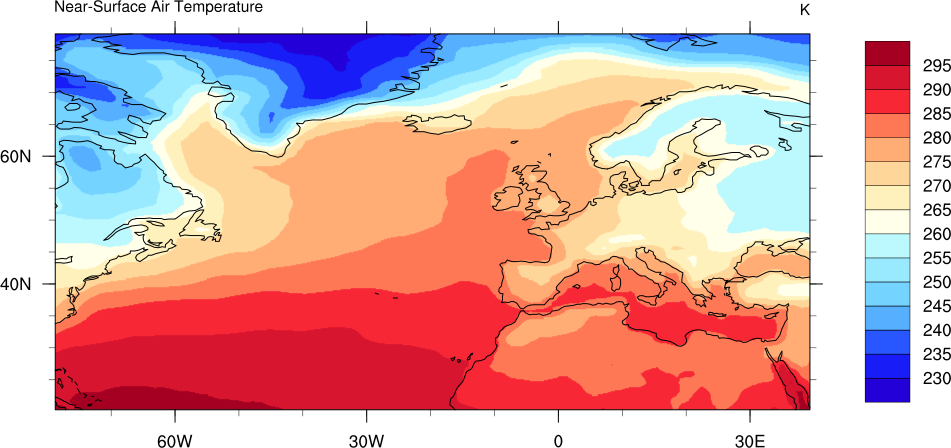

In [15]:
test = ds(project='CMIP5',
               model='CNRM-CM5',
               variable='tas',
               experiment='historical',
               period='1980-1981',
               frequency='monthly',
               domain=[20,80,-80,40] # or domain='20,80,-80,40'
        )

implot(test)

#  
## 4. The magical CMIP5_extent
### This project allows you to get a CMIP5 historical run with an extension from a scenario if you want a period extending after 2005

In [16]:
req_cmip5_extent = ds(project='CMIP5_extent', variable='tas', experiment='historical',
                      model='IPSL-CM5A-MR', period='1990-2010', table='Amon', version='latest')

req_cmip5_extent.explore('choices')
ok_req_cmip5_extent = req_cmip5_extent.explore('resolve')

summary(ok_req_cmip5_extent)

/bdd/CMIP5/output/IPSL/IPSL-CM5A-MR/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_IPSL-CM5A-MR_historical_r1i1p1_185001-200512.nc
/bdd/CMIP5/output/IPSL/IPSL-CM5A-MR/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_IPSL-CM5A-MR_rcp85_r1i1p1_200601-210012.nc


{'domain': 'global',
 'experiment': 'historical',
 'extent_experiment': 'rcp85',
 'frequency': 'mon',
 'model': 'IPSL-CM5A-MR',
 'period': 1990-2010,
 'project': 'CMIP5_extent',
 'realization': 'r1i1p1',
 'realm': 'atmos',
 'root': '/bdd',
 'simulation': '',
 'table': 'Amon',
 'variable': 'tas',
 'version': 'latest'}

### Same with all the models!

In [17]:
req_cmip5_extent = ds(project='CMIP5_extent', variable='tas', experiment='historical',
                      model='*', period='1990-2010', table='Amon', version='latest')

ens_cmip5_extent = req_cmip5_extent.explore('ensemble')
summary(ens_cmip5_extent)

Keys - values:
{'domain': 'global', 'realm': 'atmos', 'version': 'latest', 'period': 1990-2010, 'simulation': '', 'project': 'CMIP5_extent', 'experiment': 'historical', 'frequency': 'mon', 'realization': 'r1i1p1', 'variable': 'tas', 'table': 'Amon', 'model': 'ACCESS1-0', 'root': '/bdd', 'extent_experiment': 'rcp85'}
-- Ensemble members:
ACCESS1-0
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-0/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc
--
ACCESS1-3
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc
--
BNU-ESM
/bdd/CMIP5/output/BNU/BNU-ESM/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_BNU-ESM_historical_r

/bdd/CMIP5/output/NIMR-KMA/HadGEM2-AO/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_HadGEM2-AO_historical_r1i1p1_186001-200512.nc
/bdd/CMIP5/output/NIMR-KMA/HadGEM2-AO/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_HadGEM2-AO_rcp85_r1i1p1_200601-210012.nc
--
HadGEM2-CC
/bdd/CMIP5/output/MOHC/HadGEM2-CC/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_HadGEM2-CC_historical_r1i1p1_198412-200511.nc
/bdd/CMIP5/output/MOHC/HadGEM2-CC/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_HadGEM2-CC_rcp85_r1i1p1_200512-203011.nc
--
HadGEM2-ES
/bdd/CMIP5/output/MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_HadGEM2-ES_historical_r1i1p1_198412-200511.nc
/bdd/CMIP5/output/MOHC/HadGEM2-ES/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc
--
IPSL-CM5A-LR
/bdd/CMIP5/output/IPSL/IPSL-CM5A-LR/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc
/bdd/CMIP5/output/IPSL/IPSL-CM5A-LR/rcp85/m

### Safety step: check the consistency between request and actual available period with check_time_consistency_CMIP()

In [18]:
# -- ok_ens_cmip5_extent will be the checked ensemble
ok_ens_cmip5_extent = ens_cmip5_extent.copy()

for elt in ens_cmip5_extent:
    print elt
    if not check_time_consistency_CMIP(ens_cmip5_extent[elt]):
        print 'period not covered for ',elt
        ok_ens_cmip5_extent.pop(elt)

ACCESS1-0
ACCESS1-3
FGOALS-g2
period not covered for  FGOALS-g2
FIO-ESM
CMCC-CMS
MIROC-ESM
HadGEM2-AO
CMCC-CM
HadGEM2-ES
MRI-ESM1
MPI-ESM-MR
CSIRO-Mk3-6-0
CESM1-BGC
inmcm4
CanESM2
GISS-E2-R-CC
BNU-ESM
IPSL-CM5B-LR
GFDL-ESM2G
EC-EARTH
period not covered for  EC-EARTH
GFDL-ESM2M
CCSM4
NorESM1-M
IPSL-CM5A-MR
IPSL-CM5A-LR
GFDL-CM3
CNRM-CM5
GISS-E2-H
MIROC-ESM-CHEM
MRI-CGCM3
NorESM1-ME
MIROC5
GISS-E2-R
HadGEM2-CC
GISS-E2-H-CC
CMCC-CESM
bcc-csm1-1-m
MPI-ESM-LR
bcc-csm1-1
period not covered for  bcc-csm1-1
CESM1-CAM5


### Check that the time check actually worked:

In [19]:
for elt in ok_ens_cmip5_extent:
    print elt
    if not check_time_consistency_CMIP(ok_ens_cmip5_extent[elt]):
        print 'period not covered for ',elt

bcc-csm1-1-m
ACCESS1-0
ACCESS1-3
MIROC5
FIO-ESM
CMCC-CMS
MIROC-ESM
HadGEM2-ES
CMCC-CM
MPI-ESM-MR
CSIRO-Mk3-6-0
CESM1-BGC
inmcm4
CanESM2
GISS-E2-R-CC
BNU-ESM
IPSL-CM5B-LR
GFDL-ESM2G
GFDL-ESM2M
CCSM4
NorESM1-M
IPSL-CM5A-MR
IPSL-CM5A-LR
GFDL-CM3
CNRM-CM5
GISS-E2-H
MIROC-ESM-CHEM
NorESM1-ME
HadGEM2-AO
GISS-E2-R
HadGEM2-CC
GISS-E2-H-CC
CMCC-CESM
MRI-CGCM3
MPI-ESM-LR
MRI-ESM1
CESM1-CAM5


In [20]:
summary(ok_ens_cmip5_extent)

Keys - values:
{'domain': 'global', 'realm': 'atmos', 'version': 'latest', 'period': 1990-2010, 'simulation': '', 'project': 'CMIP5_extent', 'experiment': 'historical', 'frequency': 'mon', 'realization': 'r1i1p1', 'variable': 'tas', 'table': 'Amon', 'model': 'bcc-csm1-1-m', 'root': '/bdd', 'extent_experiment': 'rcp85'}
-- Ensemble members:
ACCESS1-0
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-0/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc
--
ACCESS1-3
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc
--
BNU-ESM
/bdd/CMIP5/output/BNU/BNU-ESM/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_BNU-ESM_historica

### --> You can start working!
#  

## -- More data access at CLIMERI through CliMAF

### List the available projects with 'projects()'

In [21]:
projects()

-- Available projects:
-- Project: CORDEX
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${root}%${model}%${CORDEX_domain}%${model_version}%${frequency}%${driving_model}%${realization}%${experiment}%${version}%${institute}
-- Project: ref_era5cerfacs
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${frequency}%${product}%${obs_type}%${table}
-- Project: IGCM_OUT
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${root}%${login}%${model}%${status}%${experiment}%${DIR}%${OUT}%${ave_length}%${frequency}%${clim_period}%${clim_period_length}
-- Project: CMIP6_extent
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${root}%${model}%${institute}%${mip}%${table}%${experiment}%${extent_experiment}%${realization}%${grid}%${version}%${extent_version}
-- Project: file
Facets => ${project}|${simulation}|${variable}|${period}|${domain}|${model}|${path}
-- Project: CORDEX_extent
Facets => ${project}%${simulation}%${variable}%${

## 5. Some examples with CORDEX

### Let's start with a 'blank page': 

In [22]:
req_cordex = ds(project='CORDEX', variable='tas', frequency='daily', period='1980-2005',root='/bdd')

req_cordex.explore('choices')

{'CORDEX_domain': ['AFR-22', 'AFR-44', 'EUR-11', 'EUR-44', 'SAM-22', 'SAM-44'],
 'driving_model': ['CCCma-CanESM2',
  'CNRM-CERFACS-CNRM-CM5',
  'CSIRO-QCCCE-CSIRO-Mk3-6-0',
  'ECMWF-ERAINT',
  'ICHEC-EC-EARTH',
  'IPSL-IPSL-CM5A-LR',
  'IPSL-IPSL-CM5A-MR',
  'MIROC-MIROC5',
  'MOHC-HadGEM2-ES',
  'MPI-M-MPI-ESM-LR',
  'MPI-M-MPI-ESM-MR',
  'NCC-NorESM1-M',
  'NOAA-GFDL-GFDL-ESM2G',
  'NOAA-GFDL-GFDL-ESM2M'],
 'experiment': ['evaluation', 'historical', 'rcp26', 'rcp45', 'rcp85'],
 'institute': ['CLMcom',
  'CLMcom-ETH',
  'CLMcom-KIT',
  'CNRM',
  'DHMZ',
  'DMI',
  'ETH',
  'GERICS',
  'HMS',
  'ICTP',
  'IPSL',
  'IPSL-INERIS',
  'KNMI',
  'MOHC',
  'MPI-CSC',
  'NUIM',
  'RMIB-UGent',
  'SMHI',
  'UCAN',
  'UQAM'],
 'model': ['CLMcom-CCLM4-8-17',
  'CLMcom-CCLM5-0-6',
  'CLMcom-ETH-COSMO-crCLIM-v1-1',
  'CLMcom-KIT-CCLM5-0-15',
  'CNRM-ALADIN53',
  'CNRM-ALADIN63',
  'DHMZ-RegCM4-2',
  'DMI-HIRHAM5',
  'GERICS-REMO2009',
  'GERICS-REMO2015',
  'HMS-ALADIN52',
  'ICTP-RegCM4-3',
  'I

### --> You now have all the possible choices + the list of keywords that need to be specified
### Try to specify your data request yourself!
### Important note: at the moment, ds() is not able to produce an ensemble on two keywords at the same time:
### --> we thus have to build an ensemble by hand to deal with the GCM/RCM (driving_model/model) couples
### --> See more details in the notebooks on 'handling ensembles' (part 2)
### And also note that you have CORDEX-Adjust and CORDEX_extent available

In [23]:
# -- Example with CORDEX_extent and one RCM (model)
cordex_extent = ds(project='CORDEX_extent', period='1990-2010', variable='tas', frequency='daily',
                   model_version='v1', CORDEX_domain='EUR-44', model='SMHI-RCA4')

cordex_extent.explore('choices')

{'driving_model': ['CCCma-CanESM2',
  'CNRM-CERFACS-CNRM-CM5',
  'CSIRO-QCCCE-CSIRO-Mk3-6-0',
  'IPSL-IPSL-CM5A-MR',
  'MIROC-MIROC5',
  'MOHC-HadGEM2-ES',
  'MPI-M-MPI-ESM-LR',
  'NCC-NorESM1-M',
  'NOAA-GFDL-GFDL-ESM2M'],
 'institute': 'SMHI'}

In [24]:
cordex_adjust = ds(project='CORDEX-Adjust', period='*', variable='tasmax')
cordex_adjust.explore('choices')

{}

## 6. Example with libIGCM outputs: 'IGCM_OUT' project
### You will easily recognize the keywords if you are used to work on libIGCM simulations!

In [25]:
req_ipsl = ds(project='IGCM_OUT',
              login='p86denv',
              model='IPSLCM6',
              simulation='CM6013-pi-01',
              experiment='piControl',
              DIR='OCE',
              frequency='seasonal',
              clim_period='*',
              variable='tos')
req_ipsl.explore('choices')

{}

## 7. Some references (used by the C-ESM-EP for routine evaluation)

### Pre-computed climatologies:

In [26]:
ref_climato = ds(project='ref_climatos', variable='pr')


print 'explore("choices"):'
print ref_climato.explore('choices')
print ' -- '
print 'Summary:'
summary(ref_climato)

explore("choices"):
{'table': ['Amon', 'pcmdi-metrics'], 'product': ['Amon', 'GPCP', 'TRMM'], 'obs_type': ['GPCP', 'TRMM', 'pcmdi-metrics'], 'clim_period': ['197901-200909', '200001-200912']}
 -- 
Summary:
Multiple available values for attribute "table" that is set to "*" in your ds() call:  ['Amon', 'pcmdi-metrics']
Specify one of them (within ds() or with cdef())
Multiple available values for attribute "product" that is set to "*" in your ds() call:  ['Amon', 'GPCP', 'TRMM']
Specify one of them (within ds() or with cdef())
Multiple available values for attribute "obs_type" that is set to "*" in your ds() call:  ['GPCP', 'TRMM', 'pcmdi-metrics']
Specify one of them (within ds() or with cdef())
Multiple available values for attribute "clim_period" that is set to "*" in your ds() call:  ['197901-200909', '200001-200912']
Specify one of them (within ds() or with cdef())


{'clim_period': '*',
 'domain': 'global',
 'frequency': 'annual_cycle',
 'obs_type': '*',
 'period': fx,
 'product': '*',
 'project': 'ref_climatos',
 'simulation': 'refproduct',
 'table': '*',
 'variable': 'pr'}

### And 'time series' references (with a temporal dimension)

In [27]:
from climaf.api import *

ref_ts = ds(project='ref_ts', variable='pr', period='*')

print 'explore("choices"):'
print ref_ts.explore('choices')
print ' -- '
print 'Summary:'
summary(ref_ts)

explore("choices"):
{'table': 'Amon', 'product': ['CMAP-enhanced', 'CMAP-noreanal', 'DFS4.3', 'GPCC-2.2', 'GPCP', 'GPCP-2.3', 'MERRA', 'NCEP2'], 'period': [1958-2017], 'obs_type': ['observations', 'oceanforcing', 'reanalysis']}
 -- 
Summary:
Multiple available values for attribute "product" that is set to "*" in your ds() call:  ['CMAP-enhanced', 'CMAP-noreanal', 'DFS4.3', 'GPCC-2.2', 'GPCP', 'GPCP-2.3', 'MERRA', 'NCEP2']
Specify one of them (within ds() or with cdef())
Multiple available values for attribute "obs_type" that is set to "*" in your ds() call:  ['observations', 'oceanforcing', 'reanalysis']
Specify one of them (within ds() or with cdef())


{'domain': 'global',
 'frequency': 'monthly',
 'obs_type': '*',
 'period': '*',
 'product': '*',
 'project': 'ref_ts',
 'simulation': 'refproduct',
 'table': '*',
 'variable': 'pr'}

### Tip: check the period available for each product: explore('choices', group_periods_on='product', operation=None)
https://climaf.readthedocs.io/en/master/functions_data.html#cdataset-explore-explore-data-and-periods-and-match-joker-attributes

In [28]:
ref_ts.explore('choices', group_periods_on='product', operation=None)

{'obs_type': ['observations', 'oceanforcing', 'reanalysis'],
 'period': {'CMAP-enhanced': [197901-200909],
  'CMAP-noreanal': [197901-200909],
  'DFS4.3': [1958-2006],
  'GPCC-2.2': [1979-2010],
  'GPCP': [197901-201302],
  'GPCP-2.3': [1979-2017],
  'MERRA': [197901-201310],
  'NCEP2': [1979-2011]},
 'product': ['CMAP-enhanced',
  'CMAP-noreanal',
  'DFS4.3',
  'GPCC-2.2',
  'GPCP',
  'GPCP-2.3',
  'MERRA',
  'NCEP2'],
 'table': 'Amon'}

### Last example: E-OBS, a Climserv archive stored on /bdd

In [29]:
eobs = ds(project='E-OBS')

eobs.explore('choices')

{'grid': ['0.22deg_rot', '0.25deg_reg', '0.44deg_rot', '0.50deg_reg'],
 'period': [1950-2016],
 'variable': ['pp',
  'pp_stderr',
  'rr',
  'rr_stderr',
  'tg',
  'tg_stderr',
  'tn',
  'tn_stderr',
  'tx',
  'tx_stderr']}

In [30]:
summary(eobs)

Multiple available values for attribute "variable" that is set to "*" in your ds() call:  ['pp', 'pp_stderr', 'rr', 'rr_stderr', 'tg', 'tg_stderr', 'tn', 'tn_stderr', 'tx', 'tx_stderr']
Specify one of them (within ds() or with cdef())
Multiple available values for attribute "grid" that is set to "*" in your ds() call:  ['0.22deg_rot', '0.25deg_reg', '0.44deg_rot', '0.50deg_reg']
Specify one of them (within ds() or with cdef())


{'domain': 'global',
 'frequency': 'daily',
 'grid': '*deg_*',
 'period': '*',
 'project': 'E-OBS',
 'simulation': '',
 'variable': '*'}

## And see how to add your own data in Adding_access_to_my_own_data.ipynb

#   
## This was how to access data in CliMAF at CLIMERI!
##  
##  
## -> go back to the other examples to see more on CliMAF
